In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv(r'C:\Users\keert\Desktop\shrest\Toddler Autism dataset July 2018.csv')
# Displaying the first few rows of the DataFrame to inspect the data
print(df.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

In [5]:
print(df.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')


In [6]:
# A1

class_yes = df[df['Class/ASD Traits '] == 'Yes'].iloc[:, 1:11]
class_no = df[df['Class/ASD Traits '] == 'No'].iloc[:, 1:11]

# Calculating mean for each class
mean_yes = class_yes.mean(axis=0)
mean_no = class_no.mean(axis=0)

# Calculating spread (standard deviation) for each class
std_yes = class_yes.std(axis=0)
std_no = class_no.std(axis=0)

# Calculating distance between mean vectors of classes
distance = np.linalg.norm(mean_yes - mean_no)
print("Distance between mean vectors of classes:", distance)


Distance between mean vectors of classes: 1.656995637261333


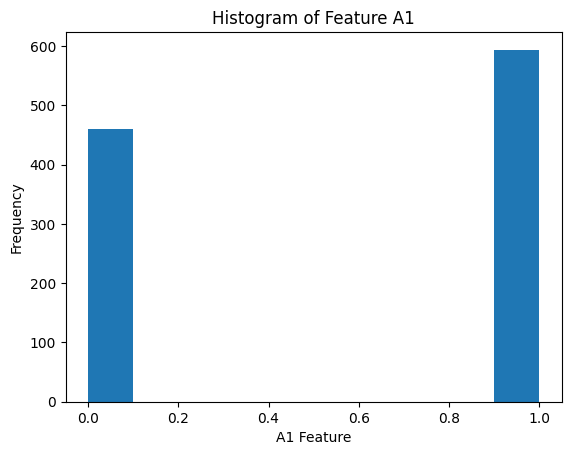

Mean of Feature A1: 0.5635673624288425
Variance of Feature A1: 0.24595919043384018


In [7]:
# A2
plt.hist(df['A1'], bins=10)
plt.xlabel('A1 Feature')
plt.ylabel('Frequency')
plt.title('Histogram of Feature A1')
plt.show()

# Calculating mean and variance
mean_A1 = np.mean(df['A1'])
variance_A1 = np.var(df['A1'])
print("Mean of Feature A1:", mean_A1)
print("Variance of Feature A1:", variance_A1)

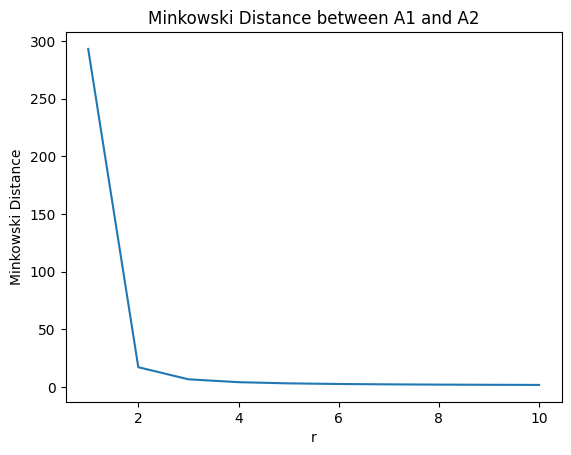

In [8]:
# A3
# Calculating the Minkowski distance between feature vectors A1 and A2
minkowski_distances = []
for r in range(1, 11):
    distance = np.linalg.norm(df['A1'] - df['A2'], ord=r)
    minkowski_distances.append(distance)

# Plot the distances
plt.plot(range(1, 11), minkowski_distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance between A1 and A2')
plt.show()

In [9]:
# A4
X = df.iloc[:, 1:11]  # Features
y = df['Class/ASD Traits ']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# A5
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# A6
accuracy = neigh.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9400630914826499


In [12]:
# A7
predictions = neigh.predict(X_test)
print("Predictions:", predictions)

Predictions: ['No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No

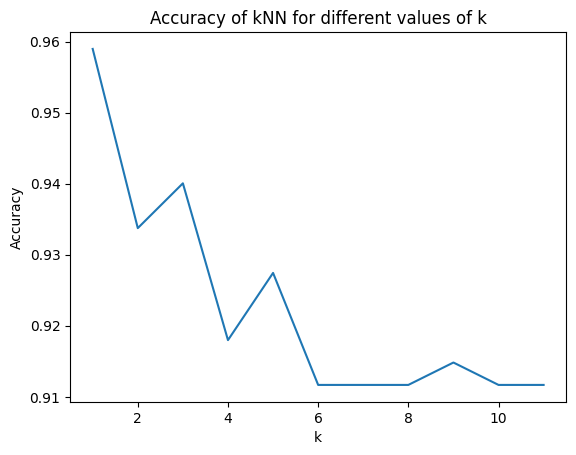

In [13]:
# A8
accuracy_scores = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

plt.plot(range(1, 12), accuracy_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN for different values of k')
plt.show()

In [14]:
# A9
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[ 92   5]
 [ 14 206]]
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91        97
         Yes       0.98      0.94      0.96       220

    accuracy                           0.94       317
   macro avg       0.92      0.94      0.93       317
weighted avg       0.94      0.94      0.94       317

